<a href="https://colab.research.google.com/github/Yanboding/StockPricePrediction/blob/main/LinearRegression/LinearRegression_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 8.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=10e3332e84d8beaa8d62c46980596e9eb99d7e3964dc19773f029a286afacc3b
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit,cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Load Data

In [24]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

start_date = '2000-01-01' 
end_date = '2018-12-31' 
#end_date = datetime.now()

symbol = 'ARKK' 
msg = "" 
address = symbol + '.csv'

try:
    dfP = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
    dfP.to_csv(address, header = True, index=True, encoding='utf-8') 
except Exception:
    msg = "yahoo problem"
    dfP = pd.DataFrame()

[*********************100%***********************]  1 of 1 completed


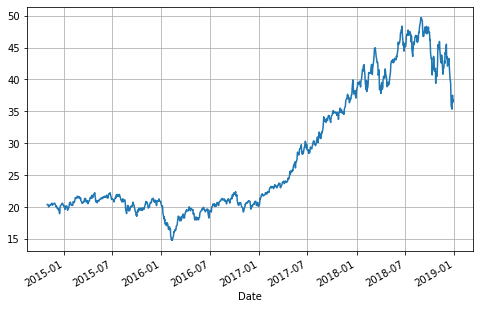

In [25]:
dfP['Close'].plot(grid=True,figsize=(8,5))

In [32]:
dfP = dfP.reset_index()
X = np.array(dfP.index).reshape(-1, 1)
y = dfP['Close']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, shuffle=True)
linreg = LinearRegression()

In [71]:
tscv = TimeSeriesSplit(n_splits=30)
scores = cross_val_score(linreg, X_train, y_train, cv=tscv, scoring=make_scorer(mean_squared_error))
scores

array([20.12777608, 26.00587614, 26.39028002, 25.52931907, 24.65918999,
       30.60138363, 22.56099953, 22.71522872, 22.75317426, 17.86402358,
       22.77670851, 24.36250749, 21.26024828, 22.88870898, 22.58918253,
       21.07444792, 15.87428211, 28.43130231, 20.31657562, 23.07716967,
       18.52044381, 24.76636566, 24.6917369 , 25.20560985, 23.85765894,
       22.430418  , 14.76547053, 22.97053775, 24.24670428, 20.00934477])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  1

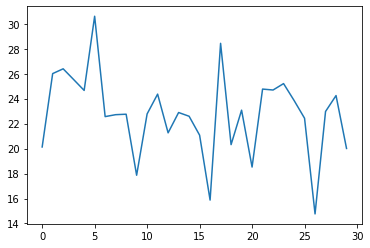

In [72]:

i = 1
mse_score = []
for tr_indx, val_indx in tscv.split(X_train):
    print(tr_indx)
    X_tr, X_val = X_train[tr_indx], X_train[val_indx]
    y_tr, y_val = y_train.iloc[tr_indx], y_train.iloc[val_indx]
    
    
    linreg.fit(X_tr, y_tr)
    y_hat = linreg.predict(X_val)
    score = mean_squared_error(y_val, y_hat)
    bias2 = np.mean(y_hat - y_val)**2
    variance = np.var(y_hat, ddof=1)
    # How to check calculate bias and variance
    #print('MSE:', score, 'Bias^2:',bias2, 'Variance:', variance, 'Bias^2+Variance:', bias2+variance)
    mse_score.append(score)
print ('95% CI for mse:', np.mean(mse_score), "+/-",
           1.96 * np.std(mse_score, ddof=1) / np.sqrt(len(mse_score)))
plt.plot(mse_score)

In [38]:
linreg.score(X_test, y_test)

0.735711695625415

In [76]:
print(linreg.coef_, linreg.intercept_)

[0.02862755] 12.914600480101326
